In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime

data = pd.read_csv('/Users/davidramsay/Documents/thesis/outdoorSensorV1/polarWindMeasure040416first.CSV', parse_dates=True, index_col='timestamp', header=0)
data2 = pd.read_csv('/Users/davidramsay/Documents/thesis/outdoorSensorV1/polarWindMeasure040416second.CSV', parse_dates=True, index_col='timestamp', header=0)


data.head()

,pressureWind
timestamp,
2016-04-05 23:14:00,0
2016-04-05 23:14:00,31081
2016-04-05 23:14:00,31078
2016-04-05 23:14:00,31085
2016-04-05 23:14:00,31091


12
[1.0, 0.4666666666666528, 0.19714285714285715, 0.078095238095224243, 0.099047619047612112, 0.089523809523795669, 0.10190476190475498, 0.099047619047612112, 0.047619047619040691, 0.0, 0.45714285714285713, 0.78000000000000003, 1.0]
[0.0, 0.5235987755982988, 1.0471975511965976, 1.5707963267948966, 2.0943951023931953, 2.6179938779914944, 3.141592653589793, 3.6651914291880923, 4.1887902047863905, 4.71238898038469, 5.235987755982989, 5.759586531581287, 6.283185307179586]


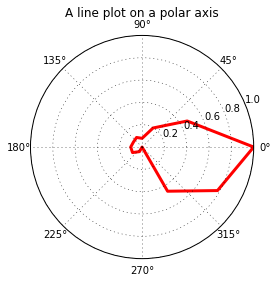

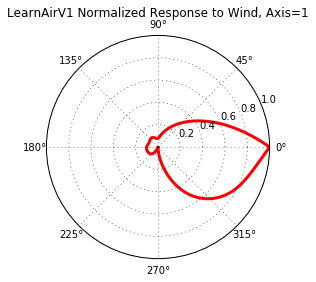

In [2]:
#every 10 samples/30 seconds we move up in speed, every 30 samples/ 1min30 we move to new angle

#skip 2, take 6, skip 24, take 6, skip 24....
#skip 12 samples, take 6, skip 24, etc should give a polar...
#skip 22, take 6, skip 24, take 6, skip 24

#average the 6 for one measurement
import numpy as np
import math
from scipy.interpolate import spline

i = 22
out = []

while i < len(data[' pressureWind']):
        out.append(sum(data.ix[i:i+6][' pressureWind'].values)/6.0)
        i += 30
        
out = out[0:12]
print len(out)
out.append(out[0])

maxval = max(out)
minval = min(out)

out = [(val-minval)/(maxval-minval) for val in out]
print out

theta = [i * (np.pi/180) for i in range(0, 390, 30)]
print theta

ax = plt.subplot(111, projection='polar')
ax.plot(theta, out, color='r', linewidth=3)
ax.set_rmax(1.0)
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()




#smoothing
x_smooth = np.linspace(0, 2*np.pi, 200)
out_smooth = spline(theta, out, x_smooth)

ax = plt.subplot(111, projection='polar')
ax.plot(x_smooth, out_smooth, color='r', linewidth=3)
ax.set_rmax(1.0)
ax.grid(True)

ax.set_title("LearnAirV1 Normalized Response to Wind, Axis=1", va='bottom')
plt.savefig('./figs/wind_polar_1.png', bbox_inches='tight', dpi=200)
plt.show()

12
[31026.0, 31034.666666666668, 31040.0, 31058.333333333332, 31040.0, 31034.666666666668, 31026.0, 31034.666666666668, 31040.0, 31058.333333333332, 31040.0, 31034.666666666668]
[0.0, 0.26804123711344963, 0.43298969072166571, 1.0, 0.43298969072166571, 0.26804123711344963, 0.0, 0.26804123711344963, 0.43298969072166571, 1.0, 0.43298969072166571, 0.26804123711344963, 0.0]
[0.0, 0.5235987755982988, 1.0471975511965976, 1.5707963267948966, 2.0943951023931953, 2.6179938779914944, 3.141592653589793, 3.6651914291880923, 4.1887902047863905, 4.71238898038469, 5.235987755982989, 5.759586531581287, 6.283185307179586]


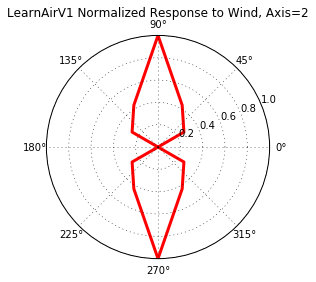

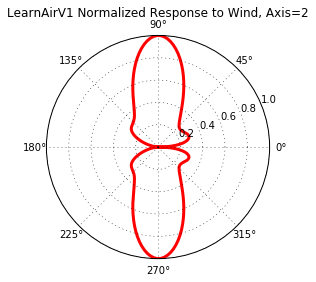

In [3]:
#every 10 samples/30 seconds we move up in speed, every 30 samples/ 1min30 we move to new angle

#skip 2, take 6, skip 24, take 6, skip 24....
#skip 12 samples, take 6, skip 24, etc should give a polar...
#skip 22, take 6, skip 24, take 6, skip 24

#average the 6 for one measurement
import numpy as np
import math
from scipy.interpolate import spline

i = 22
out = []

while i < len(data2[' pressureWind']):
        out.append(sum(data2.ix[i:i+6][' pressureWind'].values)/6.0)
        i += 30
        
out = out[0:4]
out += out[-2:0:-1]
out += out

print len(out)
print out
out.append(out[0])

maxval = max(out)
minval = min(out)

out = [(val-minval)/(maxval-minval) for val in out]
print out

theta = [i * (np.pi/180) for i in range(0, 390, 30)]
print theta

ax = plt.subplot(111, projection='polar')
ax.plot(theta, out, color='r', linewidth=3)
ax.set_rmax(1.0)
ax.grid(True)

ax.set_title("LearnAirV1 Normalized Response to Wind, Axis=2", va='bottom')
plt.savefig('./figs/wind_polar_2.png', bbox_inches='tight', dpi=200)
plt.show()


#smoothing
x_smooth2 = np.linspace(0, 2*np.pi, 200)
out_smooth2 = spline(theta, out, x_smooth)

ax = plt.subplot(111, projection='polar')
ax.plot(x_smooth2, out_smooth2, color='r', linewidth=3)
ax.set_rmax(1.0)
ax.grid(True)

ax.set_title("LearnAirV1 Normalized Response to Wind, Axis=2", va='bottom')
plt.show()

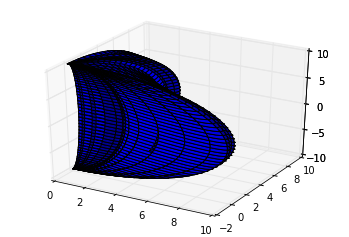

In [4]:
from matplotlib.cbook import _string_to_bool
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

'''
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')
'''

u=x_smooth #0-2pi in 200 steps
v=np.linspace(0, np.pi, 200)

x = 10 * np.outer(out_smooth2, np.sin(v))
y = 10 * np.outer(out_smooth, np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')

plt.show()